Example MAB from chatGPT for reference on working MAB algo

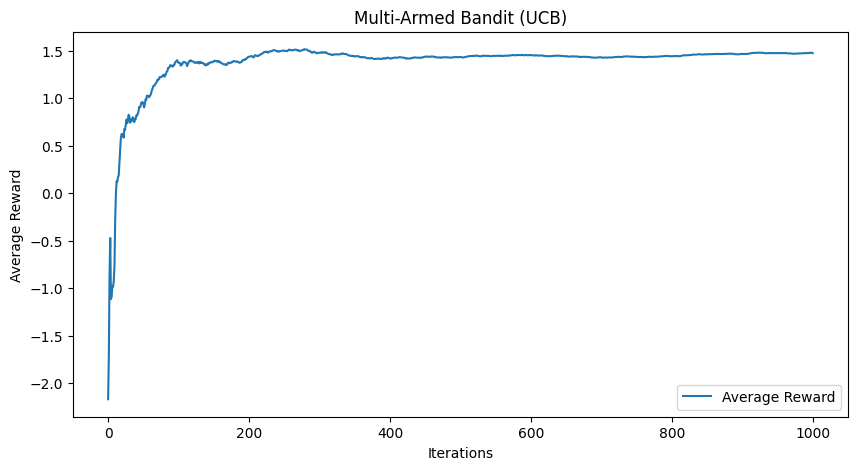

True Means:  [-1.59393327  0.41655168  1.13629523 -0.00500893 -2.51453462 -1.334212
 -0.15728008  0.42613208 -0.53349138  1.50389081]
Estimated Means after simulation:  [-2.16930253  0.53905858  1.28878639  0.01658065 -3.6834816  -1.25717996
  0.23004319  0.84514184 -0.61627608  1.56608134]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class MultiArmedBandit:
    def __init__(self, k, true_means):
        # k: number of arms
        # true_means: expected reward of each arm
        self.k = k
        self.true_means = true_means
        self.estimates = np.zeros(k)  # Estimated values of each arm
        self.arm_counts = np.zeros(k)  # Counts of how many times each arm has been pulled

    def get_reward(self, arm):
        # Simulate reward by sampling from a normal distribution around the true mean of the arm
        return np.random.normal(self.true_means[arm], 1)

    def select_arm(self, t):
        # UCB action selection
        ucb_values = self.estimates + np.sqrt(2 * np.log(t + 1) / (self.arm_counts + 1e-5))
        return np.argmax(ucb_values)  # Select the arm with the highest UCB value

    def update_estimates(self, arm, reward):
        # Update the estimated value of the arm based on new reward
        self.arm_counts[arm] += 1
        n = self.arm_counts[arm]
        # Incremental formula for mean
        self.estimates[arm] += (reward - self.estimates[arm]) / n

def simulate_bandit(k, true_means, iterations):
    bandit = MultiArmedBandit(k, true_means)
    rewards = np.zeros(iterations)
    for t in range(1, iterations + 1):
        arm = bandit.select_arm(t)
        reward = bandit.get_reward(arm)
        bandit.update_estimates(arm, reward)
        rewards[t - 1] = reward
    return rewards, bandit.estimates

def main():
    k = 10  # Number of arms
    true_means = np.random.normal(0, 1, k)  # True mean reward for each arm
    iterations = 1000  # Number of rounds to simulate

    rewards, estimated_means = simulate_bandit(k, true_means, iterations)

    cumulative_rewards = np.cumsum(rewards)
    average_rewards = cumulative_rewards / (np.arange(iterations) + 1)

    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.plot(average_rewards, label='Average Reward')
    plt.title('Multi-Armed Bandit (UCB)')
    plt.xlabel('Iterations')
    plt.ylabel('Average Reward')
    plt.legend()
    plt.show()

    print("True Means: ", true_means)
    print("Estimated Means after simulation: ", estimated_means)

if __name__ == "__main__":
    main()


UCB Algorithm: The core of the Upper Confidence Bound (UCB) is that for each arm, we compute a confidence bound on its mean based on how many times it has been selected. The algorithm then selects the arm with the highest upper bound, balancing the exploration of arms with fewer pulls (higher uncertainty) and exploiting arms that are known to give high rewards.
The formula used for UCB is:

UCB(subt)(a) = avgu(suba) + sqrt(2logt/N(suba)(t))

where:
avgu(suba) is the estimated mean of arm 
​	
 N(suba)(t) is the number of times arm a has been pulled,

t is the current time step (iteration).

This formula ensures that the arms with higher uncertainty (less pulls) are given a chance to be explored, while arms that have been pulled many times are exploited more often.
Simulation: The simulation runs for iterations number of steps, and in each step, the algorithm selects the arm using the UCB strategy, receives a reward, and updates the estimated mean for that arm.
Plot: After the simulation, we plot the average reward over time to observe how the agent's performance improves as it explores and exploits the arms.
Expected Output:
True Means: The true average reward for each arm (not known to the algorithm during the run).
Estimated Means: The final estimates of the means after the simulation.
Plot: A graph showing how the average reward evolves over time, with the goal of the agent getting closer to the optimal solution (maximizing the reward).
This UCB approach tends to perform well in scenarios where the rewards of the arms have different levels of uncertainty, and it efficiently balances exploration and exploitation.

In [22]:
class UCB:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)
        self.total_counts = 0

    def select_arm(self):
        ucb_values = self.values + np.sqrt(2 * np.log(self.total_counts + 1) / (self.counts + 1e-5))
        return np.argmax(ucb_values)

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        self.total_counts += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        self.values[chosen_arm] = ((n - 1) / n) * value + (1 / n) * reward

# Example usage

n_arms = 19
n_trials = 1000
rewards = np.random.randn(n_arms, n_trials)

agent = UCB(n_arms)


for t in range(n_trials):
    arm = agent.select_arm()
    reward = rewards[arm, t]
    agent.update(arm, reward)
    total_reward += reward

print("Total Reward:", total_reward)

Total Reward: -365.0195794476609
